### Assignment A-2

#### Create an “Academic performance” dataset of students and perform the following operations using Python. 
1.Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.

2.Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.

3.Apply  data  transformations  on  at  least  one  of  the  variables.  The  purpose  of  this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.

##### Reason and document your approach properly.

### Importing Libraries

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 

### Loading Dataset and reviewing it

In [75]:
df = pd.read_csv('./exam_data.csv', encoding='latin1')
print(df.head())
print()
print(f'Dimension of the data frame: {df.shape}')

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course math score  reading score  writing score  
0                    none         72           72.0           74.0  
1               completed         69           90.0           88.0  
2                    none         90           95.0           93.0  
3                    none         47           57.0           44.0  
4                    none         76           78.0           75.0  

Dimension of the data frame: (1000, 8)


In [76]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

#### Finding Missing values

In [77]:
missing_values = df.isnull().sum()
print(f'Missing values: \n{missing_values}')

Missing values: 
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64


##### Getting a description of the dataframe

In [78]:
summary = df.describe()
print(f'Summary of the dataset :\n{summary}')

Summary of the dataset :
       reading score  writing score
count     994.000000     991.000000
mean       68.008048      69.487386
std        16.602270      29.563757
min         3.000000      10.000000
25%        58.000000      57.000000
50%        69.500000      69.000000
75%        79.000000      79.000000
max       100.000000     567.000000


##### Converting dtype of ```math score``` from ```object``` to ```float64```.Replacing all missing values with `avg`

In [79]:
df['math score'] = df['math score'].replace('?', np.nan)
df['math score'] = df['math score'].astype('float64')
avg = (df['math score'].sum())/(df['math score'].count())
df['math score'] = df['math score'].replace(np.nan, avg)  # Convert avg to string
df['reading score'].replace(' ',np.nan, inplace=True)
df['writing score'].replace(' ',np.nan, inplace=True)
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [80]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  6
writing score                  9
dtype: int64

### Replace missing values in reading score with the mean

In [81]:
avg_reading_score = df['reading score'].mean(axis=0)
df['reading score'].replace(np.nan, avg_reading_score, inplace=True)

In [82]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  9
dtype: int64

### Replace missing values in writing score with mean

In [83]:
avg_writing_score = df['writing score'].mean(axis=0)
df['writing score'].replace(np.nan, avg_writing_score, inplace=True)

In [84]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### Using Interquartile Range to detect outliers for  `math score`  field

In [85]:
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df['math score'] < lower_bound) | (df['math score'] > upper_bound)]
outliers['math score'].dropna()

59       0.0
91      27.0
145     22.0
327     28.0
338     24.0
363     27.0
420    113.0
431    123.0
456    -89.0
466     26.0
474    334.0
787     19.0
842     23.0
980      8.0
Name: math score, dtype: float64

##### Using Interquartile Range to detect outliers for  `reading score`  field

In [86]:
Q1 = df['reading score'].quantile(0.25)
Q3 = df['reading score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df['reading score'] < lower_bound) | (df['reading score'] > upper_bound)]
outliers['reading score'].dropna()

18     22.0
19     22.0
20     12.0
21     12.0
22     13.0
23     14.0
24      9.0
25      8.0
26      7.0
27      6.0
28      4.0
29      3.0
30      5.0
31      6.0
33     22.0
34     11.0
35     11.0
36     12.0
37     12.0
59     17.0
76     26.0
327    23.0
596    24.0
980    24.0
Name: reading score, dtype: float64

##### Using Interquartile Range to detect outliers for  `writing score`  field

In [87]:
Q1 = df['writing score'].quantile(0.25)
Q3 = df['writing score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df['writing score'] < lower_bound) | (df['writing score'] > upper_bound)]
outliers['writing score'].dropna()

59      10.0
76      22.0
327     19.0
459    112.0
465    114.0
542    455.0
591    567.0
596     15.0
651    554.0
980     23.0
Name: writing score, dtype: float64

#### Distplot for math score

/tmp/ipykernel_2404/2354272343.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'])


<Axes: xlabel='math score', ylabel='Density'>

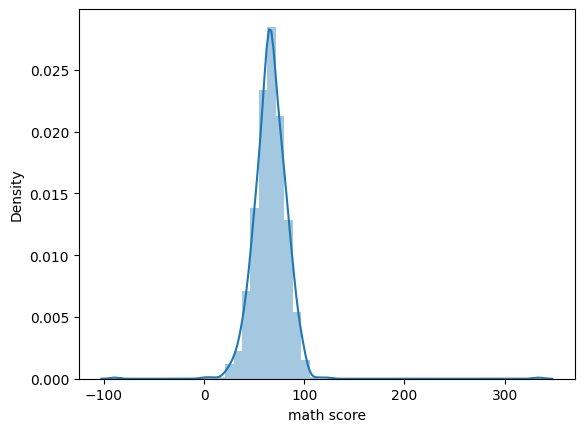

In [88]:
sns.distplot(df['math score'])

### Distplot for reading score

/tmp/ipykernel_2404/232294105.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reading score'])


<Axes: xlabel='reading score', ylabel='Density'>

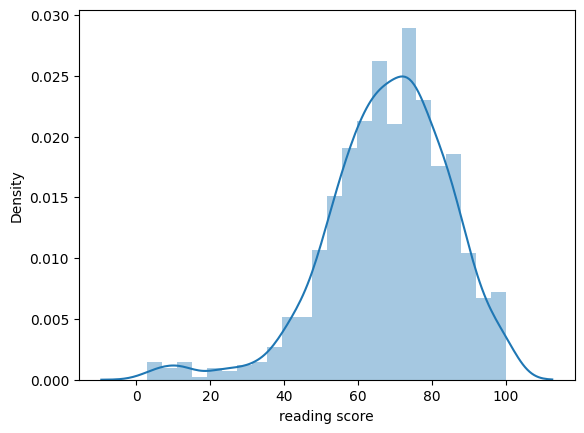

In [89]:
sns.distplot(df['reading score'])

### Distplot for writing score

/tmp/ipykernel_2404/668233639.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['writing score'])


<Axes: xlabel='writing score', ylabel='Density'>

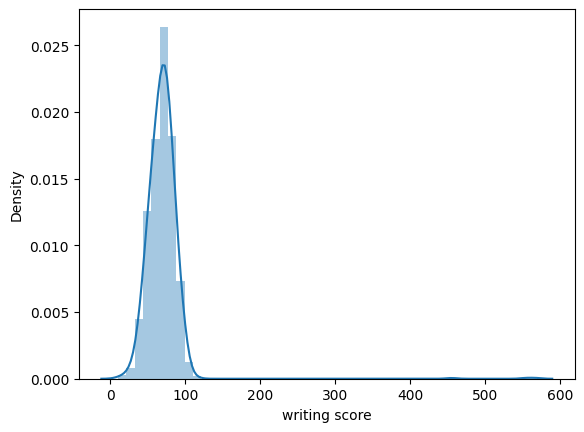

In [90]:
sns.distplot(df['writing score'])

### Using IQR to remove outliers

In [91]:
outliers.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0.0,17.0,10.0
76,male,group E,some high school,standard,none,30.0,26.0,22.0
327,male,group A,some college,free/reduced,none,28.0,23.0,19.0
459,male,group B,high school,standard,completed,72.0,65.0,112.0
465,female,group C,some college,standard,none,84.0,87.0,114.0
